## Programming Exercise 8 - Anomaly Detection and Recommender Systems

- [Anomaly Detection](#Anomaly-Detection)
- [Recommender Systems](#Recommender-Systems)

In [1]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Anomaly Detection

In [2]:
data1 = loadmat('data/ex8data1.mat')
data1.keys()

dict_keys(['__version__', 'X', 'yval', 'Xval', '__header__', '__globals__'])

In [3]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (307, 2)


In [4]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

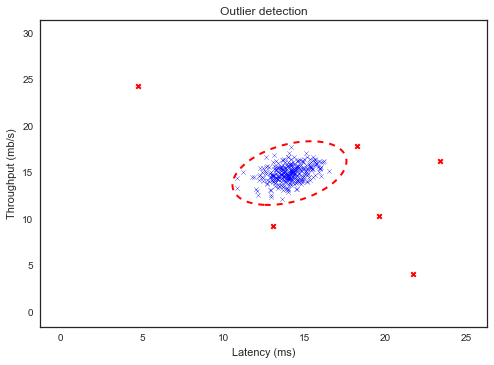

In [5]:
# Create the grid for plotting
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate the decision function and use threshold to determine outliers
y_pred = clf.decision_function(X1).ravel()
threshold = np.percentile(y_pred, 1.9)
outliers = y_pred < threshold

# Plot the observations
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x')
# Plot outliers
plt.scatter(X1[outliers][:,0], X1[outliers][:,1], c='r', marker='x', linewidths=2)
# Plot decision boundary based on threshold
plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

plt.title("Outlier detection")
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

### Recommender Systems

In [6]:
data2 = loadmat('data/ex8_movies.mat')
data2.keys()

dict_keys(['__header__', 'Y', '__version__', 'R', '__globals__'])

In [7]:
Y = data2['Y']
R = data2['R']
print('Y:', Y.shape)
print('R:', R.shape)

Y: (1682, 943)
R: (1682, 943)


In [8]:
Y

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
R

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

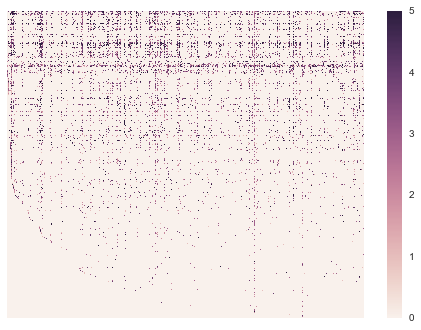

In [10]:
sns.heatmap(Y, yticklabels=False, xticklabels=False);